In [53]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [54]:
#Univariate Selection 
df1 = pd.read_csv('modified-games_detailed_info.csv')
df1.head(4)
print(df1.shape)

(19230, 20)


In [55]:
df1.head(4)

,id,primary,description,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,boardgamecategory,boardgamemechanic,boardgamefamily,boardgamedesigner,boardgameartist,boardgamepublisher,usersrated,average,bayesaverage,Board Game Rank
0,30549,Pandemic,"In Pandemic, several virulent diseases have br...",2008,2,4,45,45,45,8,['Medical'],"['Action Points', 'Cooperative Game', 'Hand Ma...","['Game: Pandemic', 'Medical: Diseases', 'Occup...",['Matt Leacock'],"['Josh Cappel', 'Christian Hanisch', 'Régis Mo...","['Z-Man Games, Inc.', '(Unknown)', 'Albi', 'As...",96241,7.61567,7.51795,91
1,822,Carcassonne,Carcassonne is a tile-placement game in which ...,2000,2,5,45,30,45,7,"['City Building', 'Medieval', 'Territory Build...","['Area Majority / Influence', 'Map Addition', ...","['Components: Black meeples', 'Components: Blu...",['Klaus-Jürgen Wrede'],"['Doris Matthäus', 'Anne Pätzke', 'Chris Quill...","['Hans im Glück', '999 Games', 'Albi', 'Bard C...",96228,7.41884,7.31105,173
2,13,Catan,"In Catan (formerly The Settlers of Catan), pla...",1995,3,4,120,60,120,10,"['Economic', 'Negotiation']","['Dice Rolling', 'Hexagon Grid', 'Income', 'Mo...","['Game: Catan', 'Promotional: Promo Board Games']",['Klaus Teuber'],"['Volkan Baga', 'Tanja Donner', 'Pete Fenlon',...","['KOSMOS', '999 Games', 'Albi', 'Astrel Games'...",96213,7.16265,7.00045,381
3,68448,7 Wonders,You are the leader of one of the 7 great citie...,2010,2,7,30,30,30,10,"['Ancient', 'Card Game', 'City Building', 'Civ...","['Card Drafting', 'Drafting', 'Hand Management...","['Game: 7 Wonders', 'Mechanic: Tableau Building']",['Antoine Bauza'],"['Antoine Bauza', 'Miguel Coimbra']","['Repos Production', 'ADC Blackfire Entertainm...",79873,7.76049,7.66214,51


In [56]:
#Deleting all text columns and keeping only numerical data
df1 = df1.drop(['id', 'primary', 'description', 'yearpublished','boardgamecategory','boardgamemechanic','boardgamefamily','boardgamedesigner','boardgameartist','boardgamepublisher','bayesaverage' ], axis=1)
df1

,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,usersrated,average,Board Game Rank
0,2,4,45,45,45,8,96241,7.61567,91
1,2,5,45,30,45,7,96228,7.41884,173
2,3,4,120,60,120,10,96213,7.16265,381
3,2,7,30,30,30,10,79873,7.76049,51
4,2,4,30,30,30,13,74959,7.62671,89
5,2,5,60,30,60,8,67987,7.42990,166
6,2,8,15,15,15,14,62582,7.63806,80
7,1,5,150,30,150,12,61565,7.95898,29
8,3,5,150,90,150,12,61164,8.00613,26
9,2,5,80,40,80,8,59221,7.27135,239


In [57]:
X = df1.iloc[:,0:7]  #independent columns
y = df1.iloc[:,-1]    #target column i.e Board Game Rank

In [58]:
#apply SelectKBest class to extract top k best features
bestfeatures = SelectKBest(score_func=chi2, k=7)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [59]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(7,'Score'))  #print k best features

         Specs         Score
6   usersrated  2.669023e+08
2  playingtime  2.094903e+08
4  maxplaytime  2.094903e+08
3  minplaytime  6.473351e+07
1   maxplayers  8.087590e+05
5       minage  2.640644e+04
0   minplayers  4.456536e+03


#Feature Importance
df1 = pd.read_csv('modified-games_detailed_info.csv')
X = df1.iloc[:,0:7]  #independent columns
y = df1.iloc[:,-1]    #target column i.e price range

#Variance Threshold
#Does not require target feature hence dropping Board Game Rank
Feature selector that removes all low-variance features.
This feature selection algorithm looks only at the features (X), not the desired outputs (y), and can thus be used for unsupervised learning.

In [60]:
df1 = pd.read_csv('modified-games_detailed_info.csv')
df1 = df1.drop(['id', 'primary', 'description', 'yearpublished','boardgamecategory','boardgamemechanic','boardgamefamily','boardgamedesigner','boardgameartist','boardgamepublisher','bayesaverage' ], axis=1)
df1 = df1.drop(['Board Game Rank'], axis=1)
df1.head(4)

,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,usersrated,average
0,2,4,45,45,45,8,96241,7.61567
1,2,5,45,30,45,7,96228,7.41884
2,3,4,120,60,120,10,96213,7.16265
3,2,7,30,30,30,10,79873,7.76049


In [17]:
from sklearn.feature_selection import VarianceThreshold
constant_filter=VarianceThreshold(threshold=0)
constant_filter.fit(df1)

VarianceThreshold(threshold=0)

In [18]:
len(df1.columns[constant_filter.get_support()])

8

In [19]:
constant_filter.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [21]:
df1.columns[constant_filter.get_support()]

Index(['minplayers', 'maxplayers', 'playingtime', 'minplaytime', 'maxplaytime',
       'minage', 'usersrated', 'average'],
      dtype='object')

In [22]:
constant_columns = [column for column in df1.columns
                    if column not in df1.columns[constant_filter.get_support()]]

print(len(constant_columns))

0


In [23]:
for feature in constant_columns:
     print(feature)

In [24]:
df1

,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,usersrated,average
0,2,4,45,45,45,8,96241,7.61567
1,2,5,45,30,45,7,96228,7.41884
2,3,4,120,60,120,10,96213,7.16265
3,2,7,30,30,30,10,79873,7.76049
4,2,4,30,30,30,13,74959,7.62671
5,2,5,60,30,60,8,67987,7.42990
6,2,8,15,15,15,14,62582,7.63806
7,1,5,150,30,150,12,61565,7.95898
8,3,5,150,90,150,12,61164,8.00613
9,2,5,80,40,80,8,59221,7.27135


In [25]:
df1_T = df1.T

In [26]:
df1_T

,0,1,2,3,4,5,6,7,8,9,...,19220,19221,19222,19223,19224,19225,19226,19227,19228,19229
minplayers,2.00000,2.00000,3.00000,2.00000,2.00000,2.0000,2.00000,1.00000,3.00000,2.00000,...,2.00000,1.00000,2.00,2.00,2.00,2.00000,2.00000,3.00000,2.00000,2.00000
maxplayers,4.00000,5.00000,4.00000,7.00000,4.00000,5.0000,8.00000,5.00000,5.00000,5.00000,...,2.00000,2.00000,2.00,6.00,8.00,4.00000,5.00000,8.00000,2.00000,4.00000
playingtime,45.00000,45.00000,120.00000,30.00000,30.00000,60.0000,15.00000,150.00000,150.00000,80.00000,...,360.00000,180.00000,0.00,60.00,120.00,0.00000,30.00000,20.00000,25.00000,90.00000
minplaytime,45.00000,30.00000,60.00000,30.00000,30.00000,30.0000,15.00000,30.00000,90.00000,40.00000,...,360.00000,180.00000,0.00,60.00,120.00,0.00000,15.00000,20.00000,15.00000,60.00000
maxplaytime,45.00000,45.00000,120.00000,30.00000,30.00000,60.0000,15.00000,150.00000,150.00000,80.00000,...,360.00000,180.00000,0.00,60.00,120.00,0.00000,30.00000,20.00000,25.00000,90.00000
minage,8.00000,7.00000,10.00000,10.00000,13.00000,8.0000,14.00000,12.00000,12.00000,8.00000,...,14.00000,10.00000,12.00,8.00,8.00,7.00000,10.00000,8.00000,8.00000,12.00000
usersrated,96241.00000,96228.00000,96213.00000,79873.00000,74959.00000,67987.0000,62582.00000,61565.00000,61164.00000,59221.00000,...,30.00000,30.00000,30.00,30.00,30.00,30.00000,30.00000,30.00000,30.00000,30.00000
average,7.61567,7.41884,7.16265,7.76049,7.62671,7.4299,7.63806,7.95898,8.00613,7.27135,...,8.38333,6.71333,6.93,5.12,4.76,5.08333,6.71667,5.16667,6.20333,9.13333


In [27]:
df1_T.duplicated()

minplayers     False
maxplayers     False
playingtime    False
minplaytime    False
maxplaytime     True
minage         False
usersrated     False
average        False
dtype: bool

In [28]:
duplicated_columns = df1_T[df1_T.duplicated()].index.values

In [29]:
duplicated_columns

array(['maxplaytime'], dtype=object)

In [30]:
df1.drop(labels = duplicated_columns,axis = 1, inplace = True)

In [31]:
df1

,minplayers,maxplayers,playingtime,minplaytime,minage,usersrated,average
0,2,4,45,45,8,96241,7.61567
1,2,5,45,30,7,96228,7.41884
2,3,4,120,60,10,96213,7.16265
3,2,7,30,30,10,79873,7.76049
4,2,4,30,30,13,74959,7.62671
5,2,5,60,30,8,67987,7.42990
6,2,8,15,15,14,62582,7.63806
7,1,5,150,30,12,61565,7.95898
8,3,5,150,90,12,61164,8.00613
9,2,5,80,40,8,59221,7.27135


In [ ]:
#Pearson corelation

In [32]:
df1 = pd.read_csv('modified-games_detailed_info.csv')
df1 = df1.drop(['id', 'primary', 'description', 'yearpublished','boardgamecategory','boardgamemechanic','boardgamefamily','boardgamedesigner','boardgameartist','boardgamepublisher','bayesaverage' ], axis=1)

In [34]:
df1.corr()

,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,usersrated,average,Board Game Rank
minplayers,1.000000,0.082396,0.009832,0.045492,0.009832,0.051410,-0.007511,-0.152032,0.089065
maxplayers,0.082396,1.000000,-0.003462,-0.005878,-0.003462,0.006551,-0.001672,-0.036809,0.020347
playingtime,0.009832,-0.003462,1.000000,0.470732,1.000000,0.032717,-0.003579,0.063192,-0.025746
minplaytime,0.045492,-0.005878,0.470732,1.000000,0.470732,0.034672,-0.005010,0.038794,-0.018942
maxplaytime,0.009832,-0.003462,1.000000,0.470732,1.000000,0.032717,-0.003579,0.063192,-0.025746
minage,0.051410,0.006551,0.032717,0.034672,0.032717,1.000000,0.071956,0.189741,-0.212169
usersrated,-0.007511,-0.001672,-0.003579,-0.005010,-0.003579,0.071956,1.000000,0.173336,-0.312941
average,-0.152032,-0.036809,0.063192,0.038794,0.063192,0.189741,0.173336,1.000000,-0.741880
Board Game Rank,0.089065,0.020347,-0.025746,-0.018942,-0.025746,-0.212169,-0.312941,-0.741880,1.000000


In [39]:
import seaborn as sns

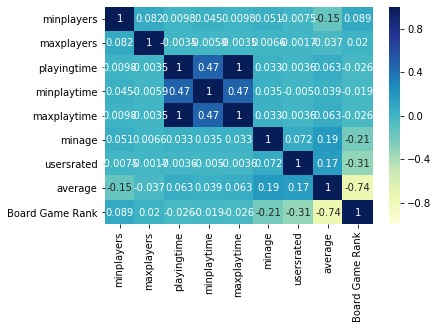

In [43]:
sns.heatmap(df1.corr(),vmin = -1, vmax = 1, cmap = "YlGnBu", annot = True)

In [45]:
corr_matrix = df1.corr()

In [46]:
corr_matrix 

,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,usersrated,average,Board Game Rank
minplayers,1.000000,0.082396,0.009832,0.045492,0.009832,0.051410,-0.007511,-0.152032,0.089065
maxplayers,0.082396,1.000000,-0.003462,-0.005878,-0.003462,0.006551,-0.001672,-0.036809,0.020347
playingtime,0.009832,-0.003462,1.000000,0.470732,1.000000,0.032717,-0.003579,0.063192,-0.025746
minplaytime,0.045492,-0.005878,0.470732,1.000000,0.470732,0.034672,-0.005010,0.038794,-0.018942
maxplaytime,0.009832,-0.003462,1.000000,0.470732,1.000000,0.032717,-0.003579,0.063192,-0.025746
minage,0.051410,0.006551,0.032717,0.034672,0.032717,1.000000,0.071956,0.189741,-0.212169
usersrated,-0.007511,-0.001672,-0.003579,-0.005010,-0.003579,0.071956,1.000000,0.173336,-0.312941
average,-0.152032,-0.036809,0.063192,0.038794,0.063192,0.189741,0.173336,1.000000,-0.741880
Board Game Rank,0.089065,0.020347,-0.025746,-0.018942,-0.025746,-0.212169,-0.312941,-0.741880,1.000000


In [51]:
#Pearson correlation coefficient
#creating set to hold the corelated features

corr_features = set()
corr_threshold = 0.5

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > corr_threshold: # we are interested in absolute coeff value
            colname = corr_matrix.columns[i]  # getting the name of column
            corr_features.add(colname)

In [52]:
corr_features

{'Board Game Rank', 'maxplaytime'}